In [32]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse
from fidelity_analysis.utils import setup_plotting

setup_plotting(dpi=300)

In [33]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")

In [34]:
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_cut_5000khz.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_cut.s2p"
# )
#
# shift_f = 5000 * 10 ** 3
# f_state_0 = 7.2669 * 10 ** 9
# pulse_frequency = f_state_0# + shift_f / 2


In [35]:
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "data_00000_1_ghz.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "data_00000_0_ghz.s2p"
# )
#
# fr0_meas = 6.065852884e9
# fr1_meas = 6.064931745e9
# pulse_frequency = (fr0_meas + fr1_meas) / 2

In [36]:
s_parameters_file_state_0 = os.path.join(
    data_dir_path,
    "S21_0_paper.s2p",
)
s_parameters_file_state_1 = os.path.join(
    data_dir_path,
    "S21_1_paper.s2p"
)

fr0_meas = 7.252456e9
fr1_meas = 7.252612e9
pulse_frequency = (fr0_meas + fr1_meas) / 2

/Users/user/PycharmProjects/qubit_readout_simulation/fidelity_analysis/pulse.py:222: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


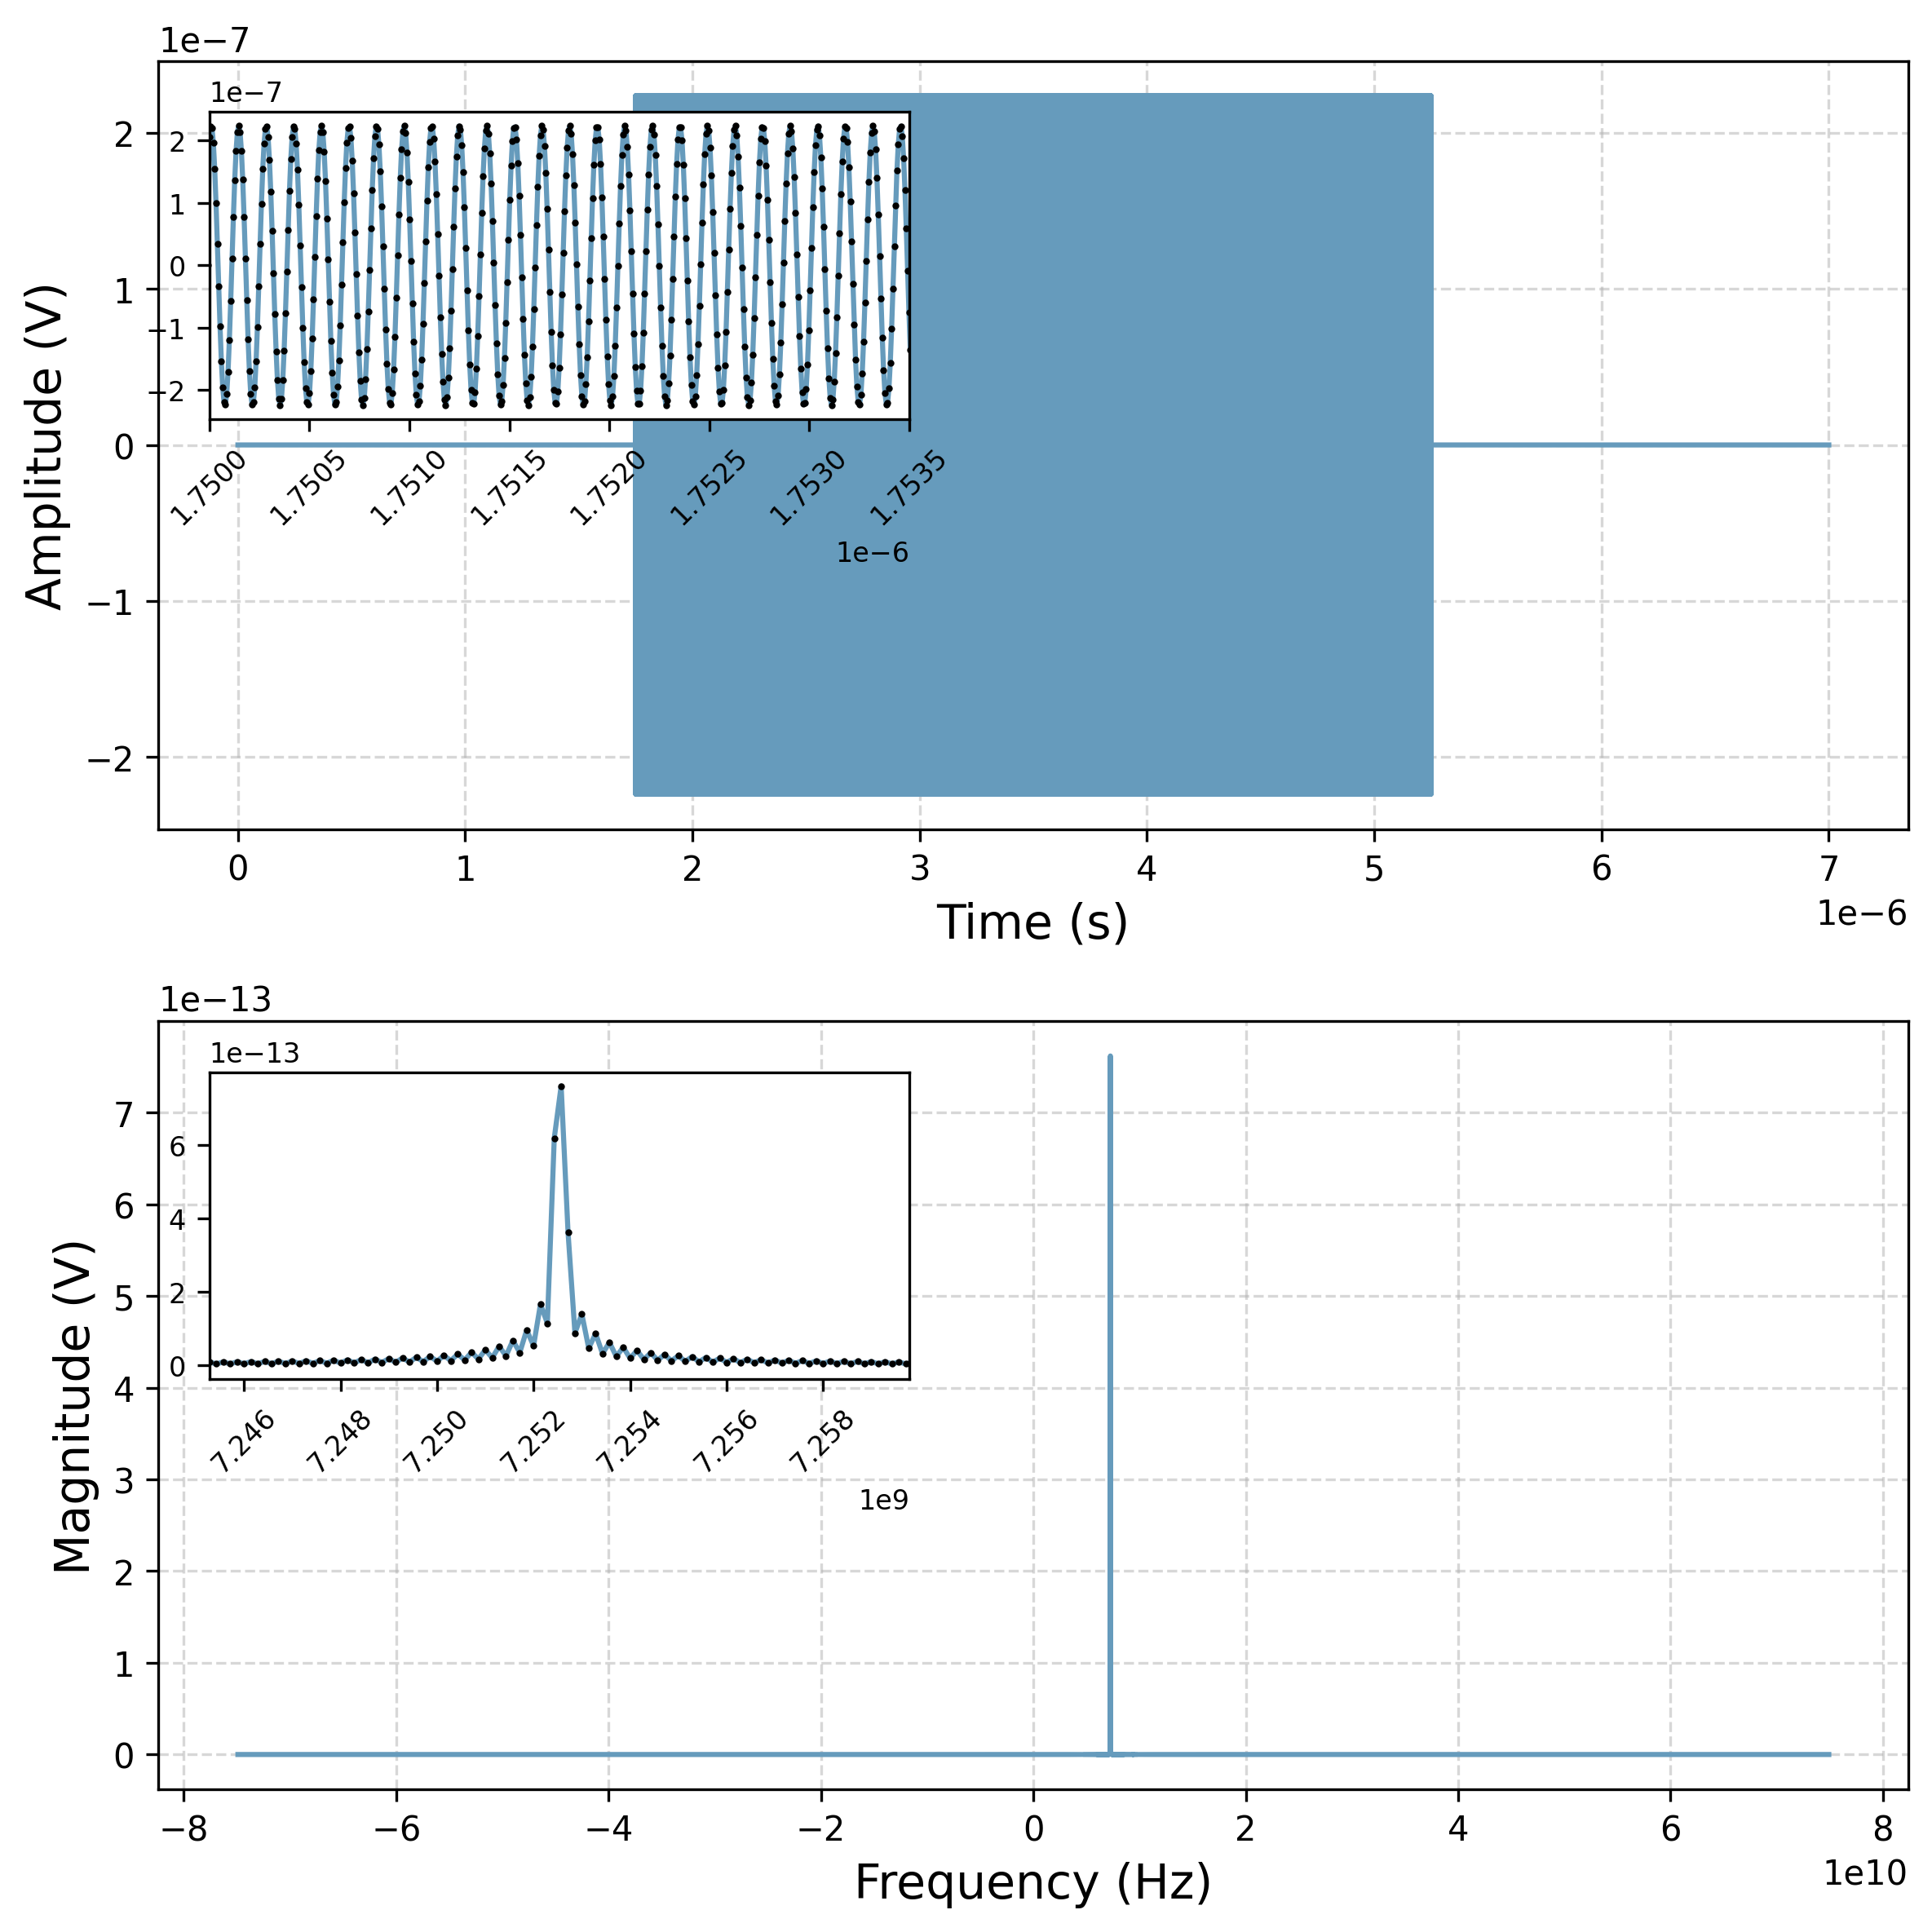

100%|██████████| 1000/1000 [00:22<00:00, 43.69it/s, Transited Pulse $|1\rangle$]


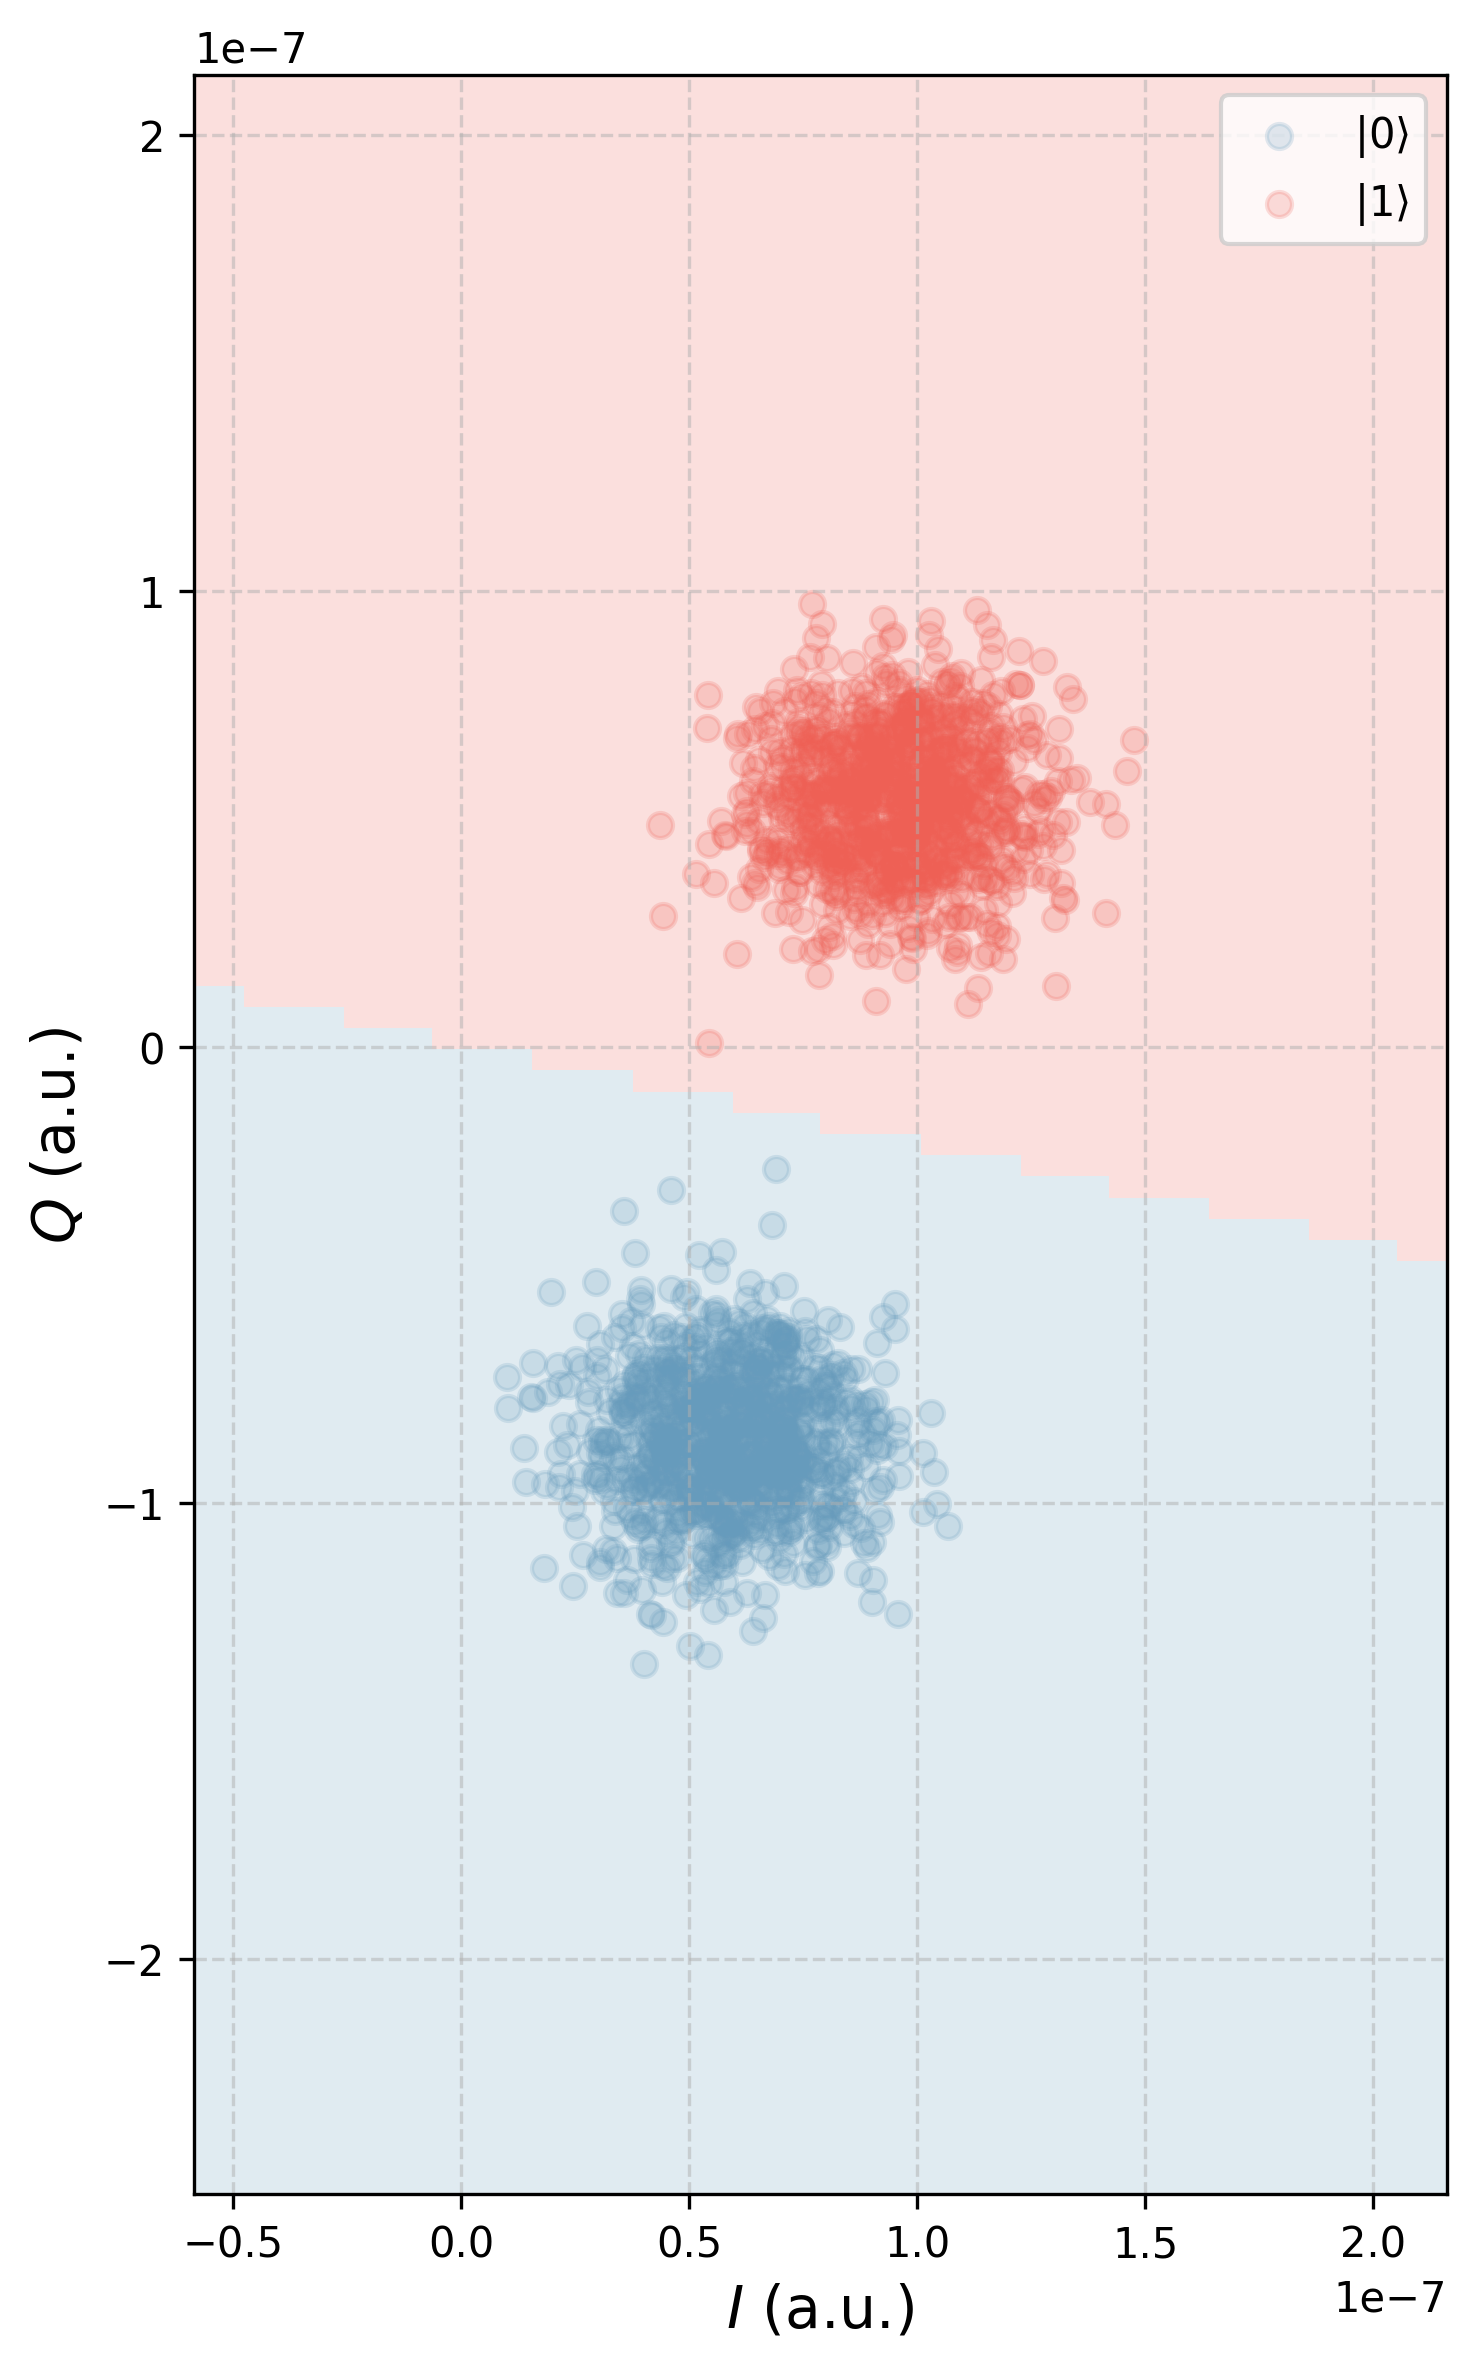

fidelity = 1.0


In [37]:
pulse_samples_number = 2 ** 20  # keep it smaller than 2 ** 19 probably because the filter in the noise function is stable up to this number

pulse_length = 3.5 * 10 ** (-6)

rect_readout_pulse = RectangularReadoutPulse(
    carrier_frequency=pulse_frequency,
    pulse_duration=pulse_length,
    pulse_power_dbm=-123,
    total_signal_time=2 * pulse_length,
    pulse_samples_number=pulse_samples_number,
)

rect_readout_pulse.plot_pulse()

fidelity_simulation = FidelitySimulation(
    s_parameters_file_state_0=s_parameters_file_state_0,
    s_parameters_file_state_1=s_parameters_file_state_1,
    readout_pulse=rect_readout_pulse,
    IQ_projection_frequency=pulse_frequency+200e6,
    num_iterations=1000,
    readout_dt=1e-9,
    plot_pulses=False,
    plot_result=True,
    disable_progress_bar=False,
)

fidelity = fidelity_simulation.run()

print("fidelity =", fidelity)

(7251730754.4, 7253337261.2)

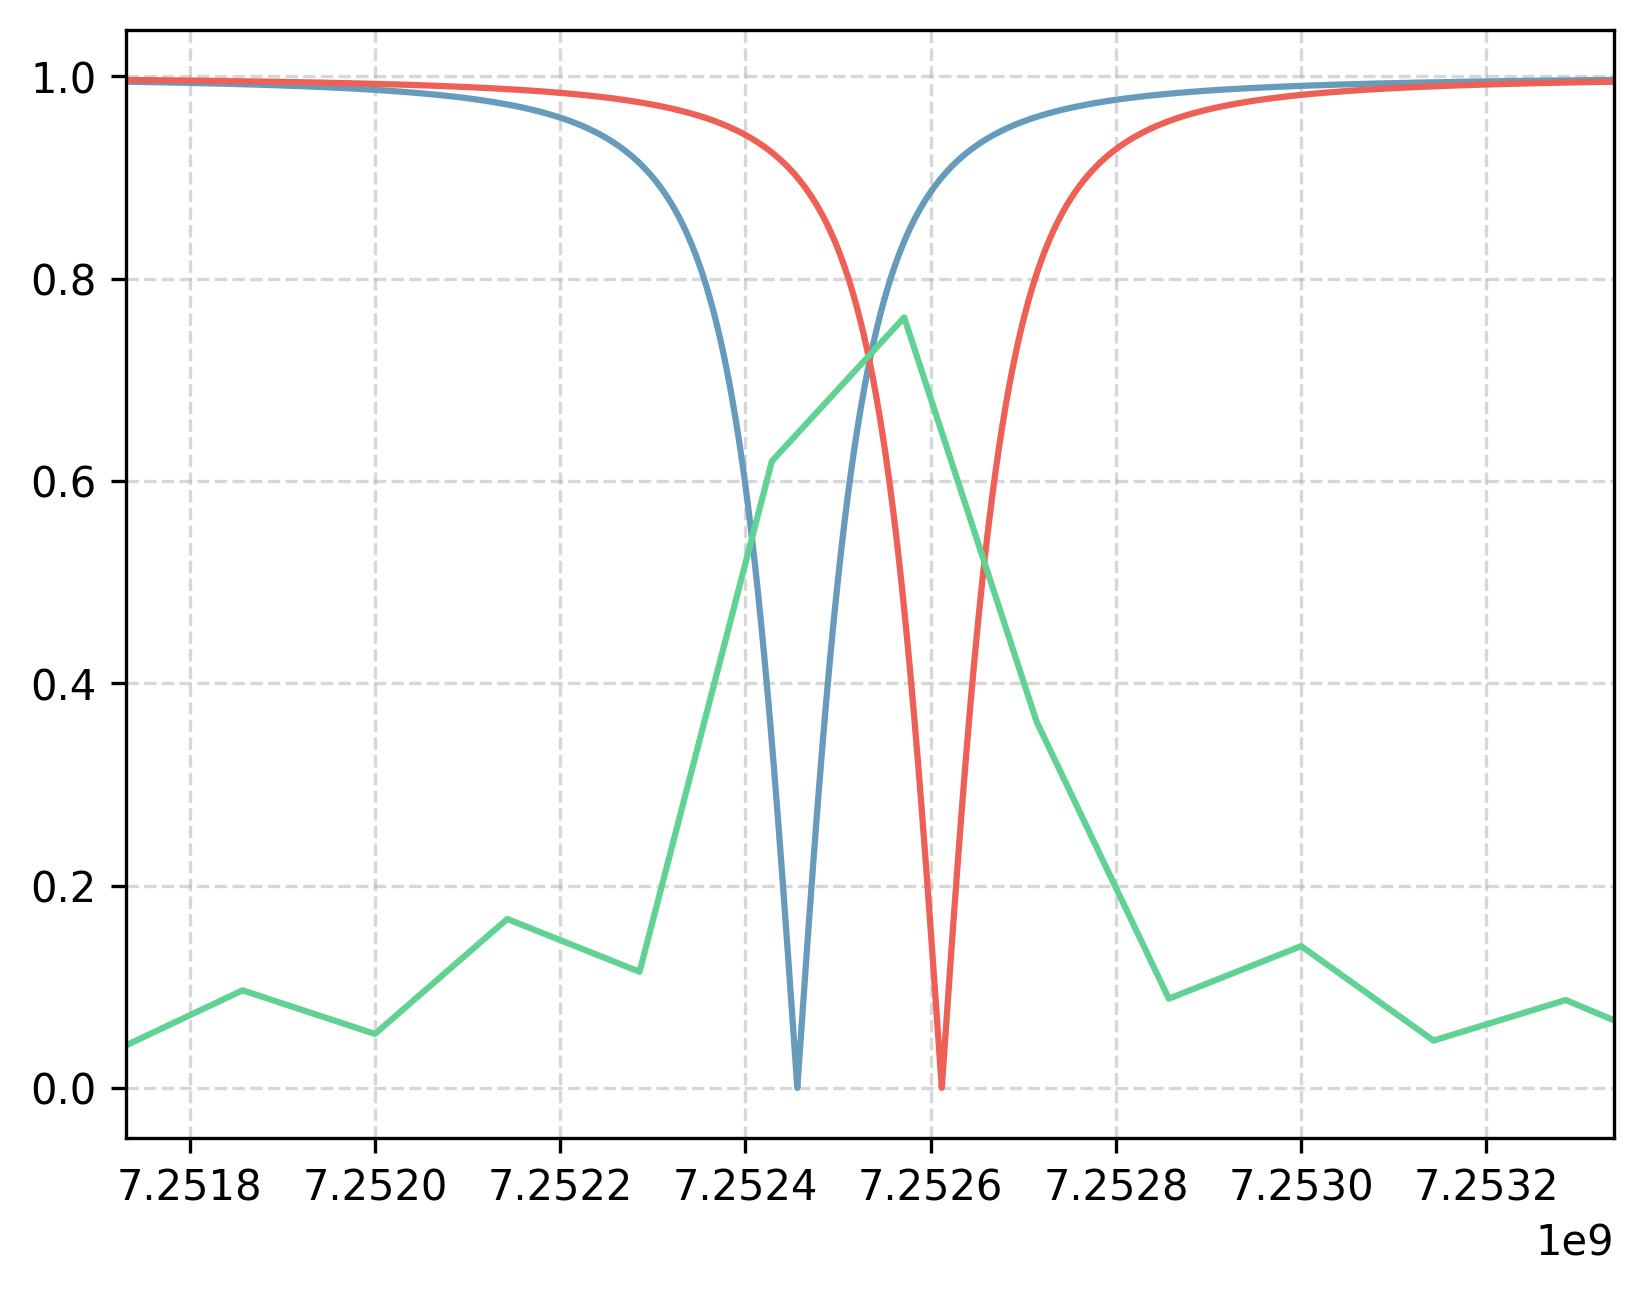

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import skrf as rf

network = rf.Network(s_parameters_file_state_1)

frequencies_ghz = network.f
s21_complex = network.s[:, 1, 0]

plt.plot(frequencies_ghz, np.abs(s21_complex))

network = rf.Network(s_parameters_file_state_0)

frequencies_ghz = network.f
s21_complex = network.s[:, 1, 0]

plt.plot(frequencies_ghz, np.abs(s21_complex))

plt.plot(rect_readout_pulse.f_signal_frequencies, np.abs(rect_readout_pulse.f_signal) * 1e12)

plt.xlim(min(frequencies_ghz), max(frequencies_ghz))

